# CS7641 Machine Learning Assignment 2

## Randomized Optimization

In [1]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

import time
import numpy as np
import gzip

## Conduct my experiment solving different optimization problems.
First define a problem, and run with the following optimization algorithm
1. Rnadom Hill Climbing Algorithm
2. Simulated Annealing Algorithm
3. Genetic Algorithm
4. MIMIC Algorithm

### Define the four-peaks problem and run experiments with different algorithms

In [56]:
###########################################
##.     Define four-peaks problem.       ##
###########################################
fitness = mlrose.FourPeaks(t_pct=0.15)   # define the fitness function using 4-peaks
# define this problem is a discrete problem with 100 data points in length
problem = mlrose.DiscreteOpt(100, fitness, maximize=True, max_val=2)



###########################################
##.          run experiments.            ##
###########################################

######### Random hill Climb algorithm
print('Working on random hill climbing algorithm')
t1 = time.time()
(best_state_randomHill, best_fitness_randomHill, fitness_curve_randomHill) = mlrose.random_hill_climb(
                    problem, max_attempts=300, max_iters=np.inf, restarts = 20,
                    init_state=None, curve=True, random_state=1)

t2 = time.time()
print('Random hill use time in s: ', t2-t1)
print('Running iterations: ', len(fitness_curve_randomHill))
print('Best fit: ', best_fitness_randomHill)



######### simulated annealing algorithm
print('Working on simulated annealing algorithm')
t1 = time.time()

(best_state_annealing, best_fitness_annealing, fitness_curve_annealing) = mlrose.simulated_annealing(
                             problem, 
                              schedule = mlrose.GeomDecay(init_temp=200, decay=0.8, min_temp=1),  # GeomDecay, ArithDecay, ExpDecay
                             max_attempts = 1000, max_iters = np.inf,
                             init_state = None, curve=True, random_state = 1)

t2 = time.time()
print('Simulated annealing use time in s: ', t2-t1)
print('Running iterations: ', len(fitness_curve_annealing))
print('Best fit: ', best_fitness_annealing)



######### genetic algorithm
print('Working on genetic algorithm')
t1 = time.time()
(best_state_ga, best_fitness_ga, fitness_curve_ga) = mlrose.genetic_alg(
                problem, pop_size=300, mutation_prob=0.0078, max_attempts=50000, 
                max_iters=np.inf, curve=True, random_state=1)
t2 = time.time()
print('Genetic algorithm use time in s: ', t2-t1)
print('Running iterations: ', len(fitness_curve_ga))
print('Best fit: ', best_fitness_ga)



######### MIMIC algorithm    
print('Working on MIMIC algorithm')
t1 = time.time()
(best_state_mimic, best_fitness_mimic, fitness_curve_mimic) = mlrose.mimic(
                problem, pop_size=200, keep_pct=0.15, max_attempts=450, 
                max_iters=np.inf, curve=True, random_state=1, fast_mimic=False)
t2 = time.time()
print('Mimic algorithm use time in s: ', t2-t1)
print('Running iterations: ', len(fitness_curve_mimic))
print('Best fit: ', best_fitness_mimic)


## plot the first figure show all the iterations of all the algorithm runs    
plt.figure()
plt.plot(fitness_curve_randomHill, '--d')
plt.plot(fitness_curve_annealing, '--*')
plt.plot(fitness_curve_ga, '--o')
plt.plot(fitness_curve_mimic, '--.')
plt.xlabel('Number of iterations')
plt.ylabel('Value of fitness')
plt.legend(['Random Hill','annealing','genetic', 'MIMIC'])


## plot a different figure to display those ones with smaller iterations
min_iter_num = min([len(fitness_curve_randomHill), 
                    len(fitness_curve_annealing), 
                    len(fitness_curve_ga), 
                    len(fitness_curve_mimic)])

display_x_axis = 5*min_iter_num # use for x-axis zoom in display

# within the display window, what is the maximum value I have
max_iter_value = max([max(fitness_curve_randomHill[0:display_x_axis]), 
                    max(fitness_curve_annealing[0:display_x_axis]), 
                    max(fitness_curve_ga[0:display_x_axis]), 
                    max(fitness_curve_mimic[0:display_x_axis])])

plt.figure()
plt.plot(fitness_curve_randomHill, '--d')
plt.plot(fitness_curve_annealing, '--*')
plt.plot(fitness_curve_ga, '--o')
plt.plot(fitness_curve_mimic, '--.')
plt.xlabel('Number of iterations')
plt.ylabel('Value of fitness')
plt.legend(['Random Hill','annealing','genetic', 'MIMIC'])
plt.xlim([0, display_x_axis])
plt.ylim([0, 1.5*max_iter_value])



### Define K-color problem and run experiments with different algorithms

Working on random hill climbing algorithm
Random hill use time in s:  3.8086118698120117
Running iterations:  4434
Best fit:  2049.0
Working on simulated annealing algorithm
Simulated annealing use time in s:  0.06830620765686035
Running iterations:  77
Best fit:  1404.0
Working on genetic algorithm
Genetic algorithm use time in s:  3.4860591888427734
Running iterations:  24
Best fit:  1280.0
Working on MIMIC algorithm
Mimic algorithm use time in s:  48.95326519012451
Running iterations:  21
Best fit:  1901.0


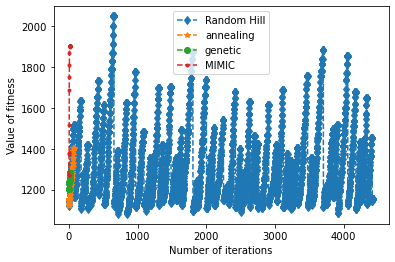

In [46]:
###########################################
##.      define K-color problem.         ##
###########################################
# First build 100 edges
length = 100  # number of nodes
# randomly select numbers from 0 to 99
num_edges = int(0.6*length*(length-1)/2)  # 60% of all the possible edges
start = [np.random.randint(0,length) for n in range(num_edges)]

edges = []
# build edges
for n in range(num_edges):
    new_rand_int = np.random.randint(0,length)
    # start and end can not be the same point
    while new_rand_int == start[n]:
        new_rand_int = np.random.randint(0,length)
    edges.append((start[n], new_rand_int))   
    
fitness = mlrose.MaxKColor(edges)   # define the fitness function using maxKColor()
# define this problem is a discrete problem
problem_color = mlrose.DiscreteOpt(length, fitness, maximize=True, max_val=2)


###########################################
##.          run experiments.            ##
###########################################

######### Random hill Climbing algorithm
print('Working on random hill climbing algorithm')
t1 = time.time()
(best_state_randomHill, best_fitness_randomHill, fitness_curve_randomHill) = mlrose.random_hill_climb(
                    problem_color, max_attempts=100, max_iters=np.inf, restarts = 5,
                    init_state=None, curve=True, random_state=1)

t2 = time.time()
print('Random hill use time in s: ', t2-t1)
print('Running iterations: ', len(fitness_curve_randomHill))
print('Best fit: ', best_fitness_randomHill)



######### simulated annealing algorithm
print('Working on simulated annealing algorithm')
t1 = time.time()

(best_state_annealing, best_fitness_annealing, fitness_curve_annealing) = mlrose.simulated_annealing(
                             problem_color, 
                             schedule = mlrose.GeomDecay(init_temp=200, decay=0.85, min_temp=1),  # GeomDecay, ArithDecay, ExpDecay
                             max_attempts = 200, max_iters = np.inf,
                             init_state = None, curve=True, random_state = 1)

t2 = time.time()
print('Simulated annealing use time in s: ', t2-t1)
print('Running iterations: ', len(fitness_curve_annealing))
print('Best fit: ', best_fitness_annealing)



######### genetic algorithm
print('Working on genetic algorithm')
t1 = time.time()
(best_state_ga, best_fitness_ga, fitness_curve_ga) = mlrose.genetic_alg(
                problem_color, pop_size=300, mutation_prob=0.0078, max_attempts=5000, 
                max_iters=np.inf, curve=True, random_state=1)
t2 = time.time()
print('Genetic algorithm use time in s: ', t2-t1)
print('Running iterations: ', len(fitness_curve_ga))
print('Best fit: ', best_fitness_ga)



######### MIMIC algorithm 
print('Working on MIMIC algorithm')
t1 = time.time()
(best_state_mimic, best_fitness_mimic, fitness_curve_mimic) = mlrose.mimic(
                problem_color, pop_size=200, keep_pct=0.16, max_attempts=100, 
                max_iters=np.inf, curve=True, random_state=1, fast_mimic=False)
t2 = time.time()
print('Mimic algorithm use time in s: ', t2-t1)
print('Running iterations: ', len(fitness_curve_mimic))
print('Best fit: ', best_fitness_mimic)



## plot the first figure show all the iterations of all the algorithm runs    
plt.figure()
plt.plot(fitness_curve_randomHill, '--d')
plt.plot(fitness_curve_annealing, '--*')
plt.plot(fitness_curve_ga, '--o')
plt.plot(fitness_curve_mimic, '--.')
plt.xlabel('Number of iterations')
plt.ylabel('Value of fitness')
plt.legend(['Random Hill','annealing','genetic', 'MIMIC'])


## plot a different figure to display those ones with smaller iterations

min_iter_num = min([len(fitness_curve_randomHill), 
                    len(fitness_curve_annealing), 
                    len(fitness_curve_ga), 
                    len(fitness_curve_mimic)])

display_x_axis = 5*min_iter_num # use for x-axis zoom in display

# within the display window, what is the maximum value I have
max_iter_value = max([max(fitness_curve_randomHill[0:display_x_axis]), 
                    max(fitness_curve_annealing[0:display_x_axis]), 
                    max(fitness_curve_ga[0:display_x_axis]), 
                    max(fitness_curve_mimic[0:display_x_axis])])

plt.figure()
plt.plot(fitness_curve_randomHill, '--d')
plt.plot(fitness_curve_annealing, '--*')
plt.plot(fitness_curve_ga, '--o')
plt.plot(fitness_curve_mimic, '--.')
plt.xlabel('Number of iterations')
plt.ylabel('Value of fitness')
plt.legend(['Random Hill','annealing','genetic', 'MIMIC'])
plt.xlim([0, display_x_axis])
plt.ylim([0, 1.1*max_iter_value])


### Define Knapsack problem and run experiments with different algorithms

Working on random hill climbing algorithm
Random hill use time in s:  0.09442305564880371
Running iterations:  1825
Best fit:  3309.0
Working on simulated annealing algorithm
Simulated annealing use time in s:  0.0009868144989013672
Running iterations:  26
Best fit:  3104.0
Working on genetic algorithm
Genetic algorithm use time in s:  0.3045530319213867
Running iterations:  21
Best fit:  3500.0
Working on MIMIC algorithm
Mimic algorithm use time in s:  59.28263783454895
Running iterations:  27
Best fit:  4147.0


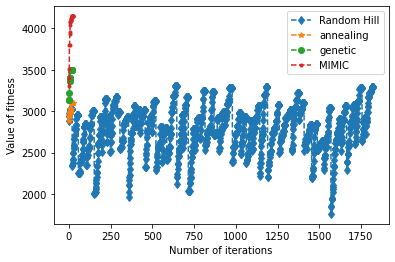

In [51]:
###########################################
##.     define Knapsack problem.         ##
###########################################
length = 100  # the total number of values 
weights_cap = 300  # use to generate weights within this range. 

weights = [np.random.randint(1,weights_cap) for n in range(length)]
values  = np.arange(length)+1


max_weight_pct = 0.6
fitness =  mlrose.Knapsack(weights, values, max_weight_pct)   # define the fitness function using Knapsack()
# define this problem is a discrete problem
problem_knapsack = mlrose.DiscreteOpt(length, fitness, maximize=True, max_val=2)



######### Random hill Climb algorithm
print('Working on random hill climbing algorithm')
t1 = time.time()
(best_state_randomHill, best_fitness_randomHill, fitness_curve_randomHill) = mlrose.random_hill_climb(
                    problem_knapsack, max_attempts=4000, max_iters=np.inf, restarts = 20,
                    init_state=None, curve=True, random_state=1)

t2 = time.time()
print('Random hill use time in s: ', t2-t1)
print('Running iterations: ', len(fitness_curve_randomHill))
print('Best fit: ', best_fitness_randomHill)


######### simulated annealing algorithm
print('Working on simulated annealing algorithm')
t1 = time.time()

(best_state_annealing, best_fitness_annealing, fitness_curve_annealing) = mlrose.simulated_annealing(
                             problem_knapsack, 
                             schedule = mlrose.GeomDecay(init_temp=500, decay=0.8, min_temp=4),  # GeomDecay, ArithDecay, ExpDecay
                             max_attempts = 10000, max_iters = np.inf,
                             init_state = None, curve=True, random_state = 1)

t2 = time.time()
print('Simulated annealing use time in s: ', t2-t1)
print('Running iterations: ', len(fitness_curve_annealing))
print('Best fit: ', best_fitness_annealing)



######### genetic algorithm
print('Working on genetic algorithm')
t1 = time.time()
(best_state_ga, best_fitness_ga, fitness_curve_ga) = mlrose.genetic_alg(
                problem_knapsack, pop_size=200, mutation_prob=0.00078, max_attempts=3000, 
                max_iters=np.inf, curve=True, random_state=1)
t2 = time.time()
print('Genetic algorithm use time in s: ', t2-t1)
print('Running iterations: ', len(fitness_curve_ga))
print('Best fit: ', best_fitness_ga)



######### MIMIC algorithm
print('Working on MIMIC algorithm')
t1 = time.time()
(best_state_mimic, best_fitness_mimic, fitness_curve_mimic) = mlrose.mimic(
                problem_knapsack, pop_size=200, keep_pct=0.2, max_attempts=3000, 
                max_iters=np.inf, curve=True, random_state=1, fast_mimic=False)
t2 = time.time()
print('Mimic algorithm use time in s: ', t2-t1)
print('Running iterations: ', len(fitness_curve_mimic))
print('Best fit: ', best_fitness_mimic)




## plot the first figure show all the iterations of all the algorithm runs    
plt.figure()
plt.plot(fitness_curve_randomHill, '--d')
plt.plot(fitness_curve_annealing, '--*')
plt.plot(fitness_curve_ga, '--o')
plt.plot(fitness_curve_mimic, '--.')
plt.xlabel('Number of iterations')
plt.ylabel('Value of fitness')
plt.legend(['Random Hill','annealing','genetic', 'MIMIC'])


## plot a different figure to display those ones with smaller iterations

min_iter_num = min([len(fitness_curve_randomHill), 
                    len(fitness_curve_annealing), 
                    len(fitness_curve_ga), 
                    len(fitness_curve_mimic)])

display_x_axis = 5*min_iter_num # use for x-axis zoom in display

# within the display window, what is the maximum value I have
max_iter_value = max([max(fitness_curve_randomHill[0:display_x_axis]), 
                    max(fitness_curve_annealing[0:display_x_axis]), 
                    max(fitness_curve_ga[0:display_x_axis]), 
                    max(fitness_curve_mimic[0:display_x_axis])])

plt.figure()
plt.plot(fitness_curve_randomHill, '--d')
plt.plot(fitness_curve_annealing, '--*')
plt.plot(fitness_curve_ga, '--o')
plt.plot(fitness_curve_mimic, '--.')
plt.xlabel('Number of iterations')
plt.ylabel('Value of fitness')
plt.legend(['Random Hill','annealing','genetic', 'MIMIC'])
plt.xlim([0, display_x_axis])
plt.ylim([0, 1.1*max_iter_value])



# Optimize the weights in a Neural Network model


In [2]:
# load each training examples, an individual images
### LOAD THE MINIST DATASET

image_size = 28
num_images = 60000
f = gzip.open('data/train-images-idx3-ubyte.gz','r')
f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
digit_img = data.reshape(num_images, image_size, image_size, 1)

# load the related training labels
f = gzip.open('data/train-labels-idx1-ubyte.gz','r')
labels = []
f.read(8)
for i in range(0,num_images):   
    buf = f.read(1)
    one_label = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)[0]
    labels.append(one_label)
    
# select 10000 examples to conduct our experiment in this assignment
selected_length = 10000
img_data   = digit_img[0:selected_length].reshape(selected_length, image_size*image_size)
img_labels = labels[0:selected_length]

print('Total number of images selected:')
print(len(img_data))

X_train_img, X_test_img, y_train_img, y_test_img = train_test_split(img_data, img_labels, 
                                                                    test_size=0.2, random_state=42)

###  LOAD THE WINE DATASET
data = pd.read_csv('data/winequality-white.csv')
val = data.values   # all values are saved as string in this dataset
numbers = []  # store the final values into numeric numbers

attri_names0 = data.keys()[0]
attri_names = attri_names0.replace('"','')
attibutes = attri_names.split(';')[0:-1] # names for all the attributes


# prepare all the data
for example in val: 
    one_obs = example[0]  # getting one observation, it was saved as string, and all attributes are together
    all_string = one_obs.split(';')
    all_val = [float(item) for item in all_string]
    numbers.append(all_val)

numbers = np.asarray(numbers)

# perpare the data and labels
wine_data  = numbers[:, 0:-1]
wine_labels = np.asarray(numbers[:, -1], dtype=int)

print('Total number of wine example selected:')
print(len(wine_data))
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(wine_data, wine_labels, test_size=0.2, random_state=42)



Total number of images selected:
10000
Total number of wine example selected:
4898


Select either 'wine' or 'image' dataset from Homework1 to work on the Homework2
Reorganize the multi-class labels as the one-hot encoding format as required by the 'mlRose' module.

In [3]:
# Decide which dataset to use
test= 'image' # select what dataset we want to use

if test == 'wine':
    my_X_train = X_train_wine
    my_y_train = y_train_wine    
    my_X_test = X_test_wine
    my_y_test = y_test_wine

elif test=='image':
    my_X_train = X_train_img
    my_y_train = y_train_img 
    my_X_test = X_test_img
    my_y_test = y_test_img

print('We will use ' + test +' dataset.')


# Normalize feature data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(my_X_train)
X_test_scaled = scaler.transform(my_X_test)

my_y_train = np.asarray(my_y_train)
my_y_test  = np.asarray(my_y_test)
# One hot encode target values
one_hot = OneHotEncoder()
y_train_hot = one_hot.fit_transform(my_y_train.reshape(-1, 1)).todense()
y_test_hot  = one_hot.transform(my_y_test.reshape(-1, 1)).todense()


We will use image dataset.


Use the preprocessed data to fit our model using 'mlrose' module.

Using mlrose with image data:
training acc is:  0.248875
Testing acc is:  0.249


Text(0, 0.5, 'Loss')

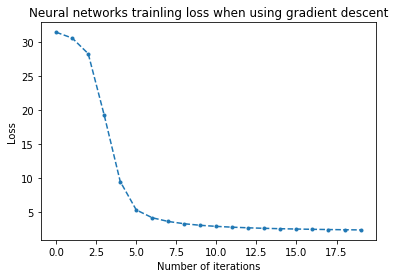

In [6]:
# set some experiment parameter
my_max_iter     = 2500
my_max_attempts = 10000

# Initialize neural network object and fit object

#########################################################
##  Use gradient descent as the baseline optimization  ##
#########################################################
# Initialize neural network object and fit object
nn_model_gd = mlrose.NeuralNetwork(hidden_nodes = [30,50,30], activation = 'relu', \
                                 algorithm = 'gradient_descent', max_iters = my_max_iter, \
                                 bias = True, is_classifier = True, learning_rate = 10**-5, \
                                 early_stopping = True, clip_max = 1e+10, max_attempts = my_max_attempts, \
                                 random_state = 1, curve=True)

print('Using mlrose with ' + test + ' data:')

t1 = time.time()
nn_model_gd.fit(X_train_scaled, y_train_hot)
t2 = time.time()
print('Gradient descent training use time in s: ', t2-t1)

# Predict labels for train set and assess accuracy
y_train_pred = nn_model_gd.predict(X_train_scaled)
y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)


# Predict labels for test set and assess accuracy
y_test_pred = nn_model_gd.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)
print('training acc is: ', y_train_accuracy)
print('Testing acc is: ',  y_test_accuracy)


plt.figure()
plt.plot(np.arange(my_max_iter),  -nn_model_gd.fitness_curve, '--.')
plt.title('Neural networks trainling loss when using gradient descent')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')


# Iterate through each number of iteartions to get the training/testing curve.
# Use gradient descent as the baseline optimization.
train_acc_list = []
test_acc_list = []
for a_max_iter in range(1, my_max_iter+2, 300):
    print('Working on iteration: ', a_max_iter)
    # Initialize neural network object and fit object
    nn_model_gd = mlrose.NeuralNetwork(hidden_nodes = [30,50,30], activation = 'relu', \
                                     algorithm = 'gradient_descent', max_iters = a_max_iter, \
                                     bias = True, is_classifier = True, learning_rate = 10**-5, \
                                     early_stopping = True, clip_max = 1e+10, max_attempts = my_max_attempts, \
                                     random_state = 1, curve=True)

    #print('Using mlrose with ' + test + ' data:')
    nn_model_gd.fit(X_train_scaled, y_train_hot)

    # Predict labels for train set and assess accuracy
    y_train_pred = nn_model_gd.predict(X_train_scaled)
    y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)
    train_acc_list.append(y_train_accuracy)

    # Predict labels for test set and assess accuracy
    y_test_pred = nn_model_gd.predict(X_test_scaled)
    y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)
    test_acc_list.append(y_test_accuracy)

print(train_acc_list)
plt.figure()
plt.plot(np.arange(my_max_iter), np.asarray(train_acc_list))
plt.plot(np.arange(my_max_iter), np.asarray(test_acc_list))


In [ ]:
# set some experiment parameter
my_max_iter     = 2500
my_max_attempts = 10000
#########################################################
##                  Random Hill climbing.              ##
#########################################################

nn_model_RHC = mlrose.NeuralNetwork(hidden_nodes = [30,50,30], activation = 'relu', \
                                 algorithm = 'random_hill_climb', max_iters = my_max_iter, \
                                 bias = True, is_classifier = True, learning_rate = 10**-5, \
                                 early_stopping = True, clip_max = 1e+10, \
                                 restarts=5, max_attempts = my_max_attempts, \
                                 random_state = 1, curve=True)



print('Using mlrose with ' + test + ' data:')
t1 = time.time()
nn_model_RHC.fit(X_train_scaled, y_train_hot)
t2 = time.time()
print('RHC training use time in s: ', t2-t1)



# Predict labels for train set and assess accuracy
y_train_pred = nn_model_RHC.predict(X_train_scaled)
y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)


# Predict labels for test set and assess accuracy
y_test_pred = nn_model_RHC.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)
print('training acc is: ', y_train_accuracy)
print('Testing acc is: ',  y_test_accuracy)

plt.figure()
plt.plot(-nn_model_RHC.fitness_curve, '--.')
plt.title('Neural networks trainling loss when using random hill climb')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')




# Iterate through each number of iteartions to get the training/testing curve.
# Use Random Hill climbing as the baseline optimization.
train_acc_list = []
test_acc_list = []
for a_max_iter in range(1, my_max_iter+2, 300):
    print('Working on iteration: ', a_max_iter)
    # Initialize neural network object and fit object
    nn_model_RHC = mlrose.NeuralNetwork(hidden_nodes = [30,50,30], activation = 'relu', \
                                    algorithm = 'random_hill_climb', max_iters = my_max_iter, \
                                    bias = True, is_classifier = True, learning_rate = 10**-5, \
                                    early_stopping = True, clip_max = 1e+10, \
                                    restarts=5, max_attempts = my_max_attempts, \
                                    random_state = 1, curve=True)

    #print('Using mlrose with ' + test + ' data:')
    nn_model_RHC.fit(X_train_scaled, y_train_hot)

    # Predict labels for train set and assess accuracy
    y_train_pred = nn_model_RHC.predict(X_train_scaled)
    y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)
    train_acc_list.append(y_train_accuracy)

    # Predict labels for test set and assess accuracy
    y_test_pred = nn_model_RHC.predict(X_test_scaled)
    y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)
    test_acc_list.append(y_test_accuracy)

print(train_acc_list)
plt.figure()
plt.plot(range(1, my_max_iter+2, 300), np.asarray(train_acc_list), '-o')
plt.plot(range(1, my_max_iter+2, 300), np.asarray(test_acc_list),'-o')
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.legend(['Training','Testing'])

In [ ]:

# set some experiment parameter
my_max_iter     = 2500
my_max_attempts = 10000
my_schedule = mlrose.GeomDecay(init_temp=500, decay=0.85, min_temp=4)
#########################################################
##                 Simulated Annealing.                ##
#########################################################

nn_model_SA = mlrose.NeuralNetwork(hidden_nodes = [30,50,30], activation = 'relu', \
                                 algorithm = 'simulated_annealing', max_iters = my_max_iter, \
                                 bias = True, is_classifier = True, learning_rate = 10**-5, \
                                 early_stopping = True, clip_max = 1e+10, \
                                 restarts=5, max_attempts = my_max_attempts, \
                                 schedule = my_schedule, 
                                 random_state = 5, curve=True)



print('Using mlrose with ' + test + ' data:')
t1 = time.time()
nn_model_SA.fit(X_train_scaled, y_train_hot)
t2 = time.time()
print('SA training use time in s: ', t2-t1)



# Predict labels for train set and assess accuracy
y_train_pred = nn_model_SA.predict(X_train_scaled)
y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)


# Predict labels for test set and assess accuracy
y_test_pred = nn_model_SA.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)
print('training acc is: ', y_train_accuracy)
print('Testing acc is: ',  y_test_accuracy)

plt.figure()
plt.plot(-nn_model_SA.fitness_curve, '--.')
#plt.title('Neural networks trainling loss when using simmulated annealing')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')


# Use Simulated Annealing as the baseline optimization.
train_acc_list = []
test_acc_list = []
for a_max_iter in range(1, my_max_iter+2, 300):
    print('Working on iteration: ', a_max_iter)
    # Initialize neural network object and fit object
    nn_model_SA = mlrose.NeuralNetwork(hidden_nodes = [30,50,30], activation = 'relu', \
                                    algorithm = 'simulated_annealing', max_iters = my_max_iter, \
                                    bias = True, is_classifier = True, learning_rate = 10**-5, \
                                    early_stopping = True, clip_max = 1e+10, \
                                    restarts=5, max_attempts = my_max_attempts, \
                                    schedule = my_schedule, 
                                    random_state = 5, curve=True)

    #print('Using mlrose with ' + test + ' data:')
    nn_model_SA.fit(X_train_scaled, y_train_hot)

    # Predict labels for train set and assess accuracy
    y_train_pred = nn_model_SA.predict(X_train_scaled)
    y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)
    train_acc_list.append(y_train_accuracy)

    # Predict labels for test set and assess accuracy
    y_test_pred = nn_model_SA.predict(X_test_scaled)
    y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)
    test_acc_list.append(y_test_accuracy)

print(train_acc_list)
plt.figure()
plt.plot(range(1, my_max_iter+2, 300), np.asarray(train_acc_list), '-o')
plt.plot(range(1, my_max_iter+2, 300), np.asarray(test_acc_list),'-o')
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.legend(['Training','Testing'])


In [ ]:
# set some experiment parameter
my_max_iter     = 250
my_max_attempts = 500
#########################################################
##                 Genetic Algorithm.                  ##
#########################################################

nn_model_GA = mlrose.NeuralNetwork(hidden_nodes = [30,50,30], activation = 'relu', \
                                 algorithm = 'genetic_alg', max_iters = my_max_iter, \
                                 bias = True, is_classifier = True, learning_rate = 10**-5, \
                                 early_stopping = True, clip_max = 1e+10, \
                                 pop_size = 300, mutation_prob= 0.0078, 
                                 restarts=5, max_attempts = my_max_attempts, \
                                 schedule = mlrose.GeomDecay(init_temp=200, decay=0.85, min_temp=1), 
                                 random_state = 1, curve=True)

print('Using mlrose with ' + test + ' data:')
t1 = time.time()
nn_model_GA.fit(X_train_scaled, y_train_hot)
t2 = time.time()
print('SA training use time in s: ', t2-t1)


# Predict labels for train set and assess accuracy
y_train_pred = nn_model_GA.predict(X_train_scaled)
y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)


# Predict labels for test set and assess accuracy
y_test_pred = nn_model_GA.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)
print('training acc is: ', y_train_accuracy)
print('Testing acc is: ',  y_test_accuracy)

plt.figure()
plt.plot(-nn_model_GA.fitness_curve, '--.')
plt.title('Neural networks trainling loss when using genetic algorithm')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')



# Use genetic_alg as the baseline optimization.
train_acc_list = []
test_acc_list = []
for a_max_iter in range(1, my_max_iter+2, 30):
    print('Working on iteration: ', a_max_iter)
    # Initialize neural network object and fit object
    nn_model_GA = mlrose.NeuralNetwork(hidden_nodes = [30,50,30], activation = 'relu', \
                                    algorithm = 'genetic_alg', max_iters = my_max_iter, \
                                    bias = True, is_classifier = True, learning_rate = 10**-5, \
                                    early_stopping = True, clip_max = 1e+10, \
                                    pop_size = 300, mutation_prob= 0.0078, 
                                    restarts=5, max_attempts = my_max_attempts, \
                                    schedule = mlrose.GeomDecay(init_temp=200, decay=0.85, min_temp=1), 
                                    random_state = 1, curve=True)

    #print('Using mlrose with ' + test + ' data:')
    nn_model_GA.fit(X_train_scaled, y_train_hot)

    # Predict labels for train set and assess accuracy
    y_train_pred = nn_model_GA.predict(X_train_scaled)
    y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)
    train_acc_list.append(y_train_accuracy)

    # Predict labels for test set and assess accuracy
    y_test_pred = nn_model_GA.predict(X_test_scaled)
    y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)
    test_acc_list.append(y_test_accuracy)

print(train_acc_list)
plt.figure()
plt.plot(range(1, my_max_iter+2, 300), np.asarray(train_acc_list), '-o')
plt.plot(range(1, my_max_iter+2, 300), np.asarray(test_acc_list),'-o')
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.legend(['Training','Testing'])
